# PCA and DBSCAN codealong

---

In this detailed codealong/lab we are going to practice and look more extensively at PCA (primarily). If time permits, we will also look at a popular unsupervized learning clustering algorithm called "Density Based Clustering of Applications with Noise" (DBSCAN).

PCA is one of the more difficult concepts/algorithms in this class to understand well in such a short amount of time, but considering how often people use it to simplify their data, reduce noise in their data, and find unmeasured "latent variables", it is important to spend the time to understand what's going on.

Hopefully this will help with that!

---

### How does DBSCAN work?

DBSCAN, in a nutshell, groups datapoints together based on "density", or in other words how close they are together. Nearby points get assigned to a common cluster, whereas outlier points get assigned to their own clusters. DBSCAN is very effective and attractive for its simplicity and minimal pre-specified conditions; for these reasons it is the most popular clustering algorithm.

There are only two parameters that need to be specified for DBSCAN:

    eps : a minimum distance between points that can define a "connection"
    
    min_samples : minimum number of points that a point needs to have 
                  as neighbors to define it as a "core sample"
    
**Core samples** are by design the points that lie internally within a cluster. Non-core samples do not meet the minimum required neighboring points, but are still connected to a cluster defined by a core sample or samples. Hence these points lie on the edges of a cluster.

The DBSCAN algorithm proceeds iteratively through the points, determining via the distance measure and minimum samples specified whether points are core samples, edge samples, or outliers (which are not assigned to any cluster).

---

### Dataset

The dataset we are using for this lab is a subset of the [much more detailed speed dating dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (successes with or opinions of other individuals). It also contains no "follow-up" information where individuals are re-asked the same questions about themselves. All it contains are things that an individual enjoys doing, their ratings of themselves on how desireable they are, and how they think others rate them on desireability.

Specifically, the columns in the data are outlined below:

    subject_id                   :   unique individual identifier
    like_sports                  :   enjoyment of participating in sports
    like_tvsports                :   enjoyment of watching sports on tv
    like_exercise                :   enjoyment of exercise
    like_food                    :   enjoyment of food
    like_museums                 :   enjoyment of museums
    like_art                     :   enjoyment of art
    like_hiking                  :   enjoyment of hiking
    like_gaming                  :   enjoyment of pl aying games
    like_clubbing                :   enjoyment of going clubbing/partying
    like_reading                 :   enjoyment of reading
    like_tv                      :   enjoyment of tv in general
    like_theater                 :   enjoyment of the theater (plays, musicals, etc.)
    like_movies                  :   enjoyment of movies
    like_concerts                :   enjoyment of concerts
    like_music                   :   enjoyment of music
    like_shopping                :   enjoyment of shopping
    like_yoga                    :   enjoyment of yoga
    subjective_attractiveness    :   how attractive they rate themselves
    subjective_sincerity         :   how sincere they rate themselves
    subjective_intelligence      :   how intelligent they rate themselves
    subjective_fun               :   how fun they rate themselves
    subjective_ambition          :   how ambitious they rate themselves
    objective_attractiveness     :   percieved rating others would give them on how attractive they are
    objective_sincerity          :   percieved rating others would give them on how sincere they are
    objective_intelligence       :   percieved rating others would give them on how intelligent they are
    objective_fun                :   percieved rating others would give them on how fun they are
    objective_ambition           :   percieved rating others would give them on how ambitious they are
    
There are 551 subjects total.

---

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing, decomposition, cluster

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
plt.style.use("fivethirtyeight")

In [4]:
df = pd.read_csv("../../datasets/speed_dating_user_attributes.csv")

In [5]:
df.head()

subject_id  wave  like_sports  like_tvsports  like_exercise  like_food  \
0           1     1          9.0            2.0            8.0        9.0   
1           2     1          3.0            2.0            7.0       10.0   
2           3     1          3.0            8.0            7.0        8.0   
3           4     1          1.0            1.0            6.0        7.0   
4           5     1          7.0            4.0            7.0        7.0   

   like_museums  like_art  like_hiking  like_gaming         ...          \
0           1.0       1.0          5.0          1.0         ...           
1           8.0       6.0          3.0          5.0         ...           
2           5.0       5.0          8.0          4.0         ...           
3           6.0       7.0          7.0          5.0         ...           
4           6.0       8.0          6.0          6.0         ...           

   subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                        6.0                   8.0                      8.0   
1                        7.0                   5.0                      8.0   
2                        8.0                   9.0                      9.0   
3                        7.0                   8.0                      7.0   
4                        6.0                   3.0                     10.0   

   subjective_fun  subjective_ambition  objective_attractiveness  \
0             8.0                  7.0                       NaN   
1            10.0                  3.0                       NaN   
2             8.0                  8.0                       NaN   
3             9.0                  8.0                       NaN   
4             6.0                  8.0                       NaN   

   objective_sincerity  objective_intelligence  objective_fun  \
0                  NaN                     NaN            NaN   
1                  NaN                     NaN            NaN   
2                  NaN                     NaN            NaN   
3                  NaN                     NaN            NaN   
4                  NaN                     NaN            NaN   

   objective_ambition  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

In [6]:
df.fillna(0, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 29 columns):
subject_id                   551 non-null int64
wave                         551 non-null int64
like_sports                  551 non-null float64
like_tvsports                551 non-null float64
like_exercise                551 non-null float64
like_food                    551 non-null float64
like_museums                 551 non-null float64
like_art                     551 non-null float64
like_hiking                  551 non-null float64
like_gaming                  551 non-null float64
like_clubbing                551 non-null float64
like_reading                 551 non-null float64
like_tv                      551 non-null float64
like_theater                 551 non-null float64
like_movies                  551 non-null float64
like_concerts                551 non-null float64
like_music                   551 non-null float64
like_shopping                551 non-null float64

In [8]:
scaler = preprocessing.MinMaxScaler()

In [9]:
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])

In [10]:
like_df = df[[i for i in df.columns if "like_" in i]]

In [11]:
sub_df = df[[i for i in df.columns if "subjective_" in i]]

In [12]:
ob_df = df[[i for i in df.columns if "objective_" in i]]

In [13]:
like_df.head()

like_sports  like_tvsports  like_exercise  like_food  like_museums  \
0          0.9            0.2            0.8        0.9           0.1   
1          0.3            0.2            0.7        1.0           0.8   
2          0.3            0.8            0.7        0.8           0.5   
3          0.1            0.1            0.6        0.7           0.6   
4          0.7            0.4            0.7        0.7           0.6   

   like_art  like_hiking  like_gaming  like_clubbing  like_reading  like_tv  \
0       0.1          0.5     0.071429            0.5      0.461538      0.9   
1       0.6          0.3     0.357143            0.8      0.769231      0.1   
2       0.5          0.8     0.285714            0.5      0.538462      0.8   
3       0.7          0.7     0.357143            0.7      0.538462      0.7   
4       0.8          0.6     0.428571            0.8      0.461538      0.8   

   like_theater  like_movies  like_concerts  like_music  like_shopping  \
0           0.1          1.0            1.0         0.9            0.8   
1           0.9          0.8            0.7         0.8            0.3   
2           0.7          0.7            0.7         0.5            0.8   
3           0.9          0.7            0.8         0.7            0.1   
4           0.6          0.6            0.3         0.7            0.8   

   like_yoga  
0        0.1  
1        0.1  
2        0.7  
3        0.8  
4        0.3

In [14]:
sub_df.head()

subjective_attractiveness  subjective_sincerity  subjective_intelligence  \
0                        0.6                   0.8                      0.8   
1                        0.7                   0.5                      0.8   
2                        0.8                   0.9                      0.9   
3                        0.7                   0.8                      0.7   
4                        0.6                   0.3                      1.0   

   subjective_fun  subjective_ambition  
0             0.8                  0.7  
1             1.0                  0.3  
2             0.8                  0.8  
3             0.9                  0.8  
4             0.6                  0.8

In [15]:
ob_df.describe()

objective_attractiveness  objective_sincerity  objective_intelligence  \
count                551.000000           551.000000              551.000000   
mean                   0.394918             0.452087                0.470599   
std                    0.361728             0.412212                0.421348   
min                    0.000000             0.000000                0.000000   
25%                    0.000000             0.000000                0.000000   
50%                    0.500000             0.600000                0.700000   
75%                    0.700000             0.800000                0.900000   
max                    1.000000             1.000000                1.000000   

       objective_fun  objective_ambition  
count     551.000000          551.000000  
mean        0.420871            0.433212  
std         0.390268            0.401004  
min         0.000000            0.000000  
25%         0.000000            0.000000  
50%         0.500000            0.600000  
75%         0.800000            0.800000  
max         1.000000            1.000000

In [68]:
def decomp(df, n):
    pca = decomposition.PCA(n_components=n)
    pca.fit(df)
    eigpairs = zip(pca.explained_variance_, pca.components_)
    eigpairs.sort(reverse=True)
    try:
        decomposed = pd.DataFrame(pca.transform(df), columns=df.columns)
    except:
        decomposed = pd.DataFrame(pca.transform(df))
    sns.pairplot(decomposed, kind="reg");
    
    return pca, decomposed, eigpairs

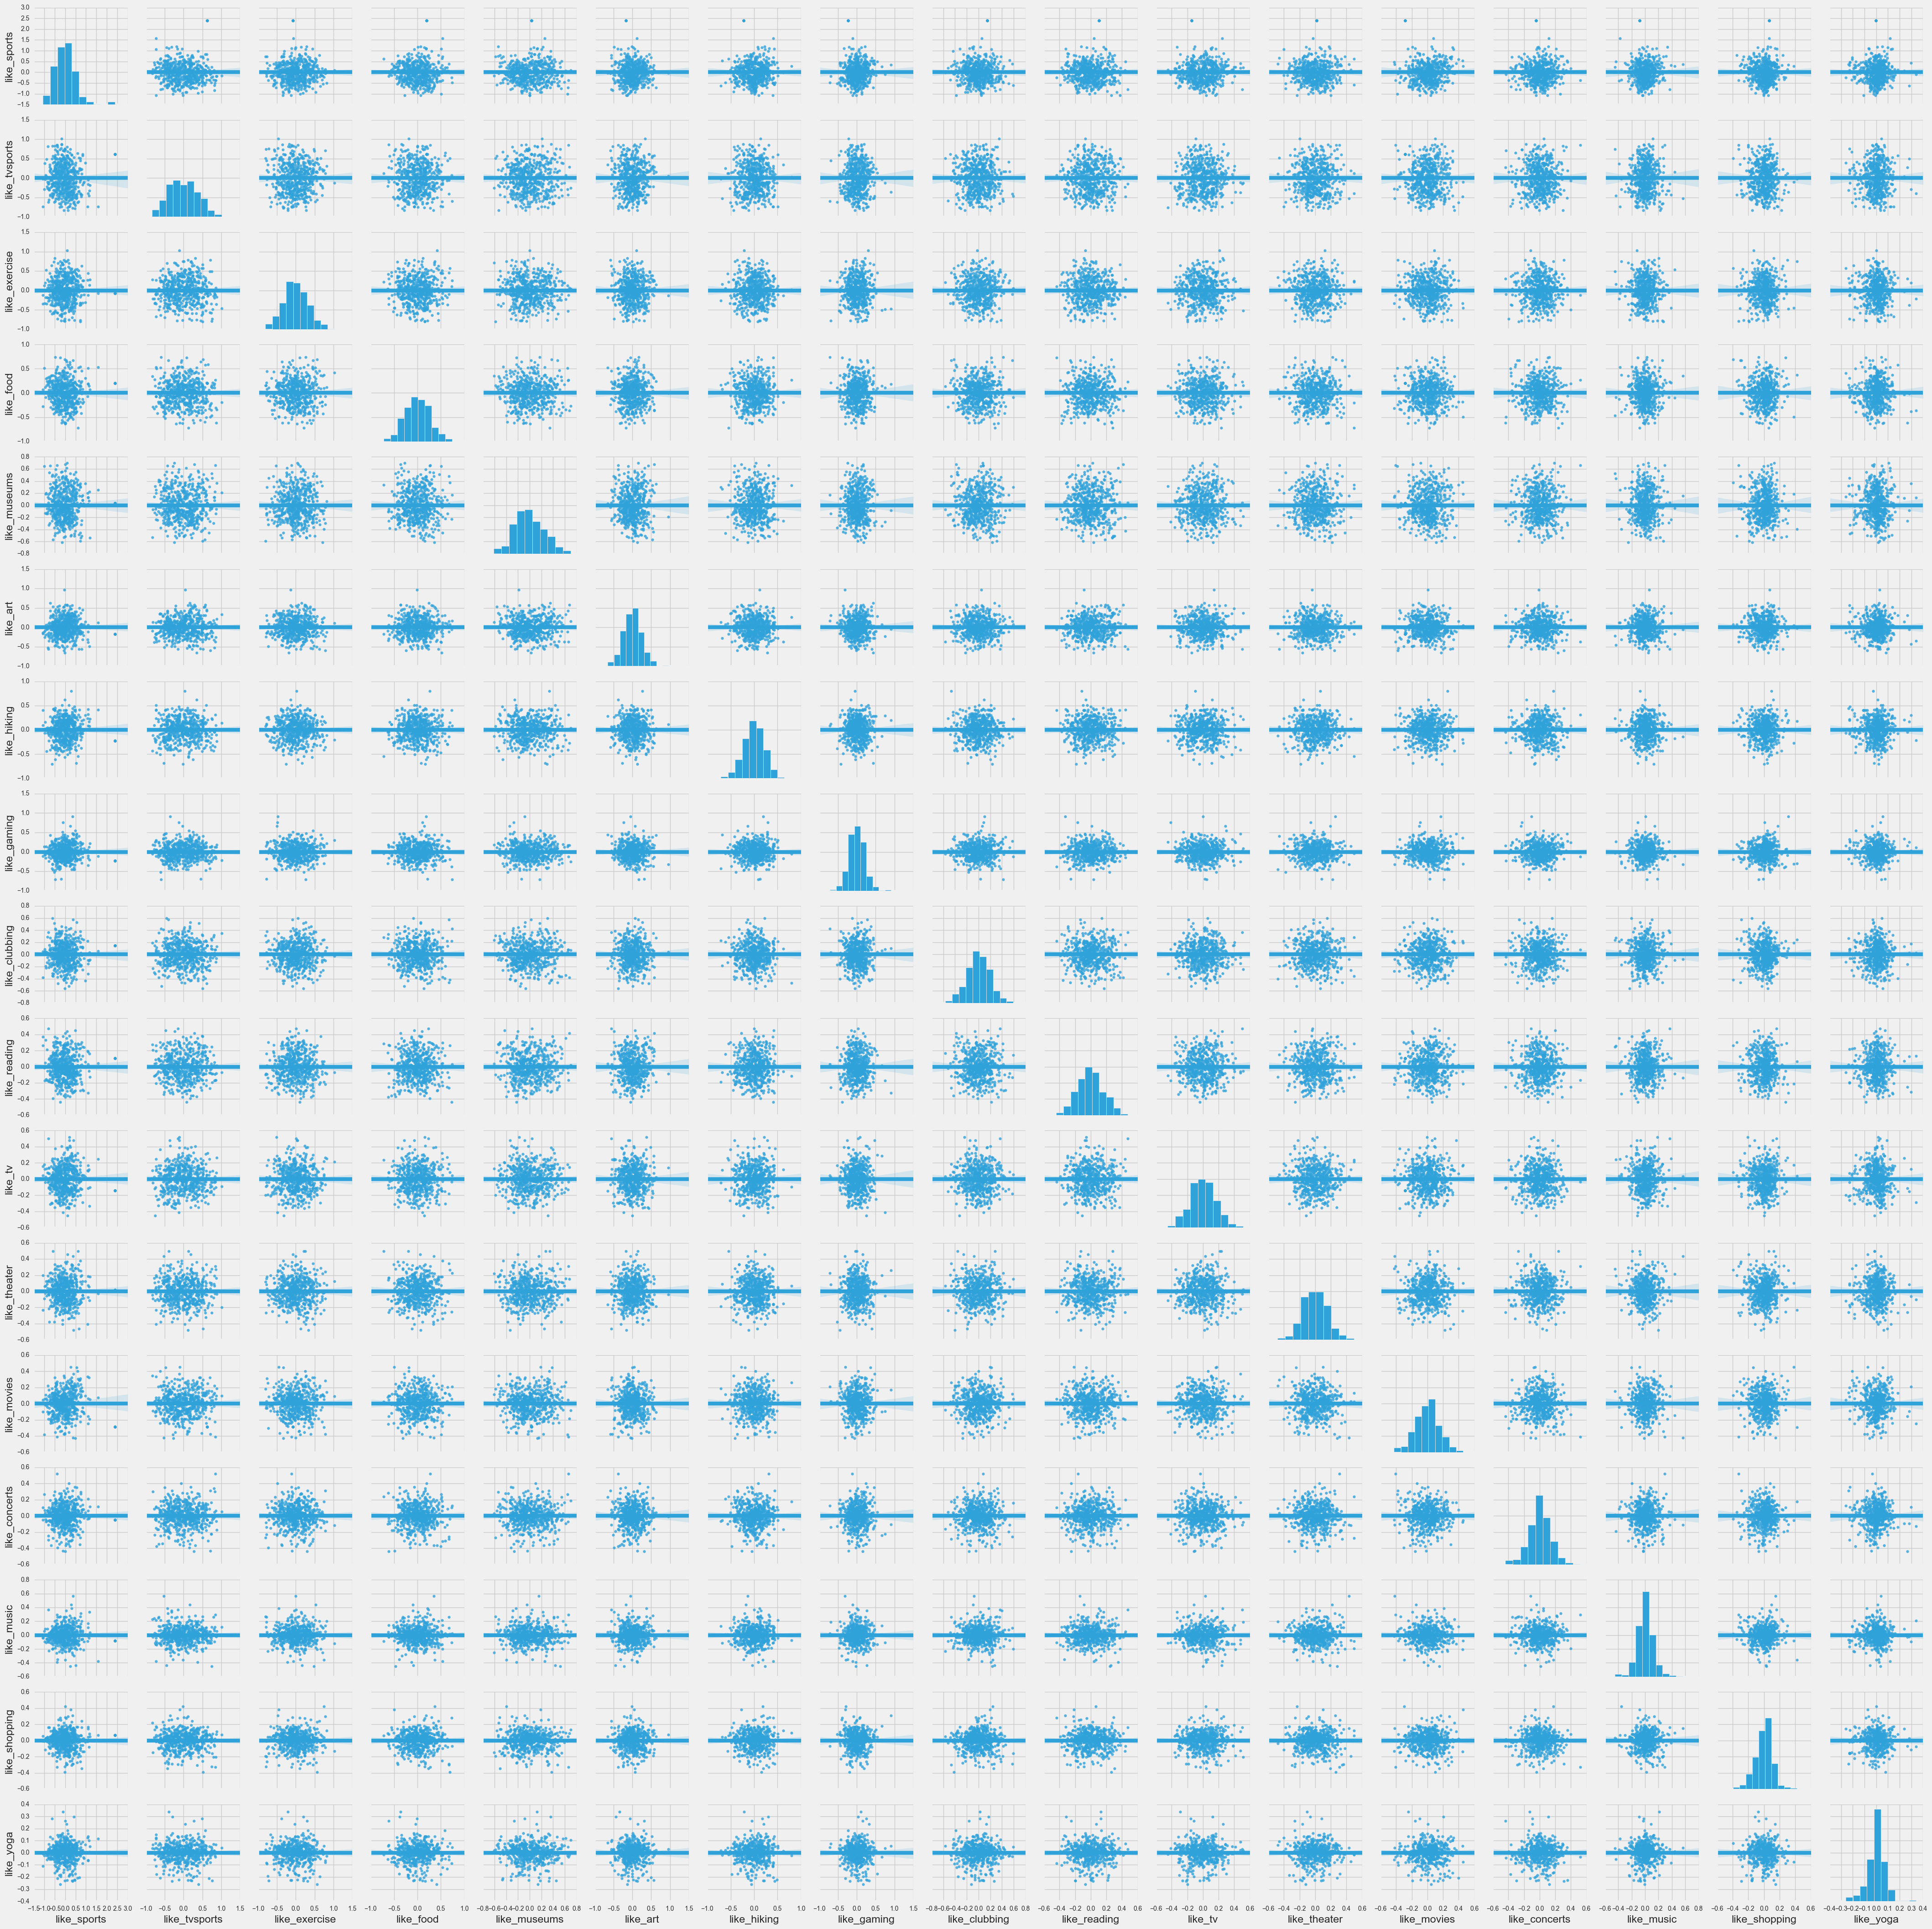

In [60]:
like_pca, like_decomposed, like_pairs = decomp(like_df, None)

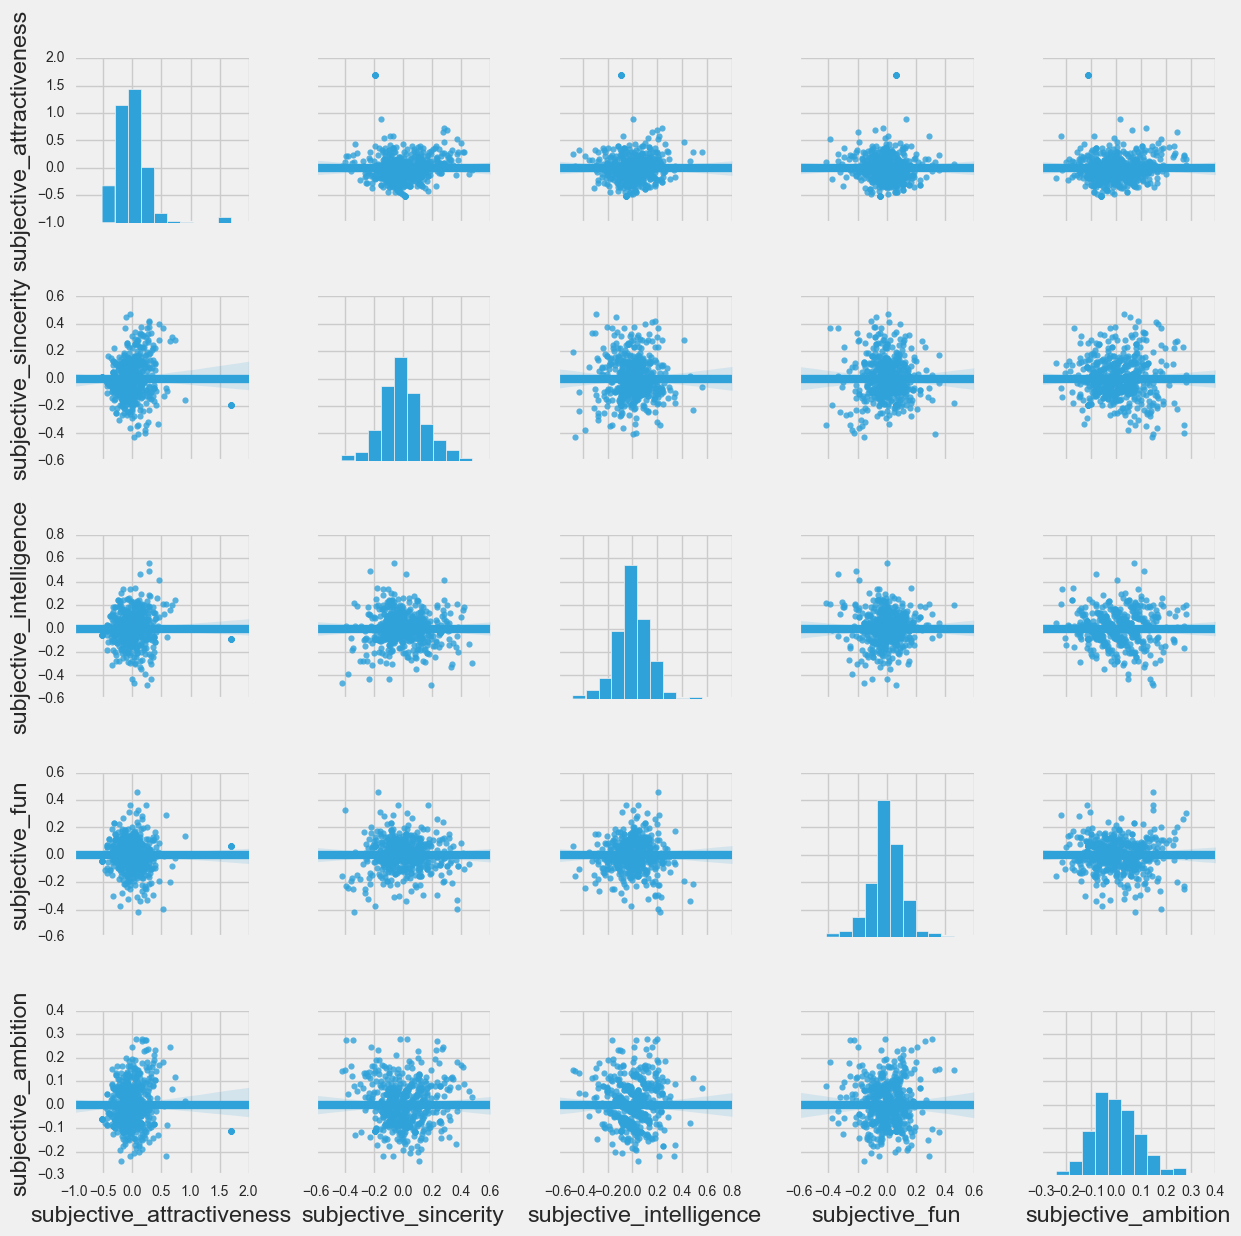

In [61]:
sub_pca, sub_decomp, sub_pairs = decomp(sub_df, None)

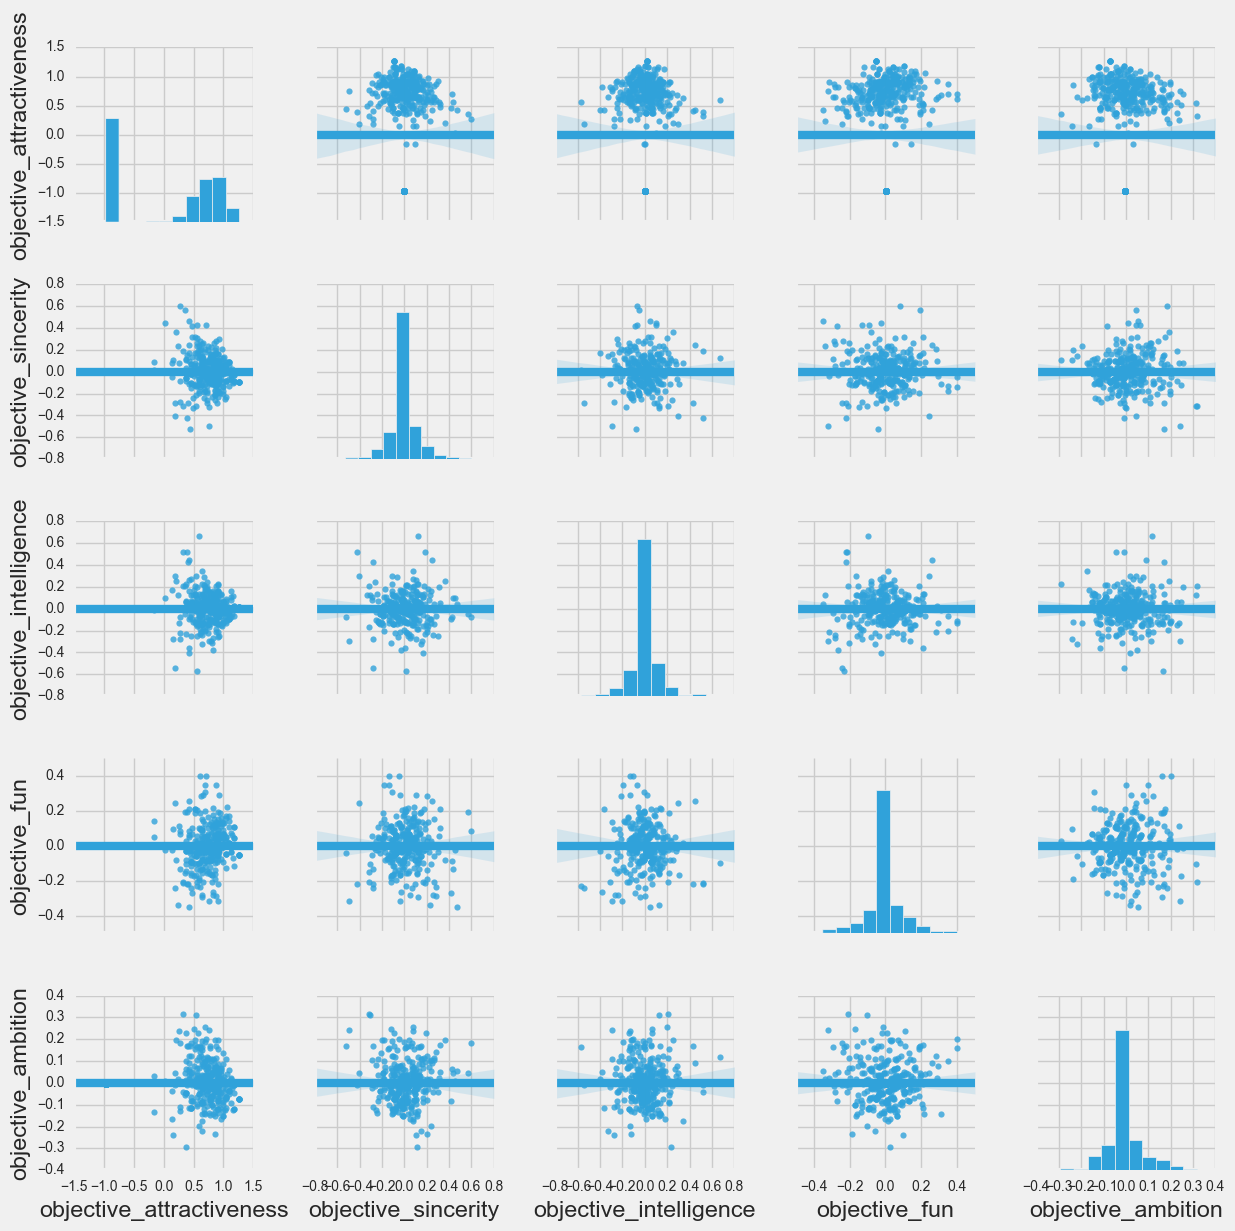

In [63]:
ob_pca, ob_decomp, ob_pairs = decomp(ob_df, None)

In [64]:
[i for i, j in like_pairs][:5]

[0.25023862570756,
 0.14307819502452371,
 0.10348131061914333,
 0.066847960561532166,
 0.061556410971462285]

In [65]:
[i for i, j in sub_pairs][:5]

[0.093747996751217449,
 0.021418309901803441,
 0.017985653674087273,
 0.012599928460624004,
 0.0084644675483799142]

In [66]:
[i for i, j in ob_pairs][:5]

[0.74844169260451754,
 0.01443699625247321,
 0.012637741657936484,
 0.0089639529152649791,
 0.0054956047911903366]

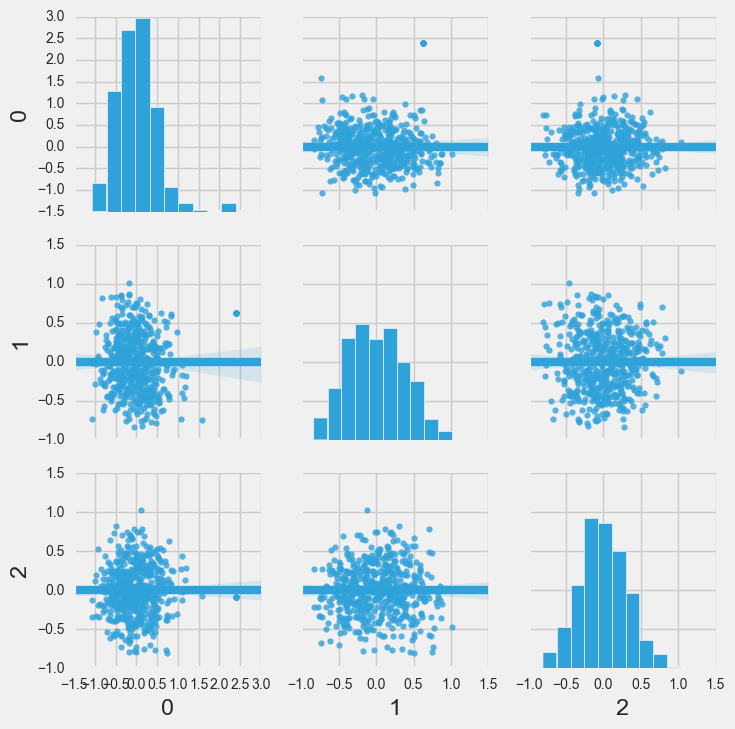

In [69]:
like_pca, like_decomposed, like_pairs = decomp(like_df, 3)

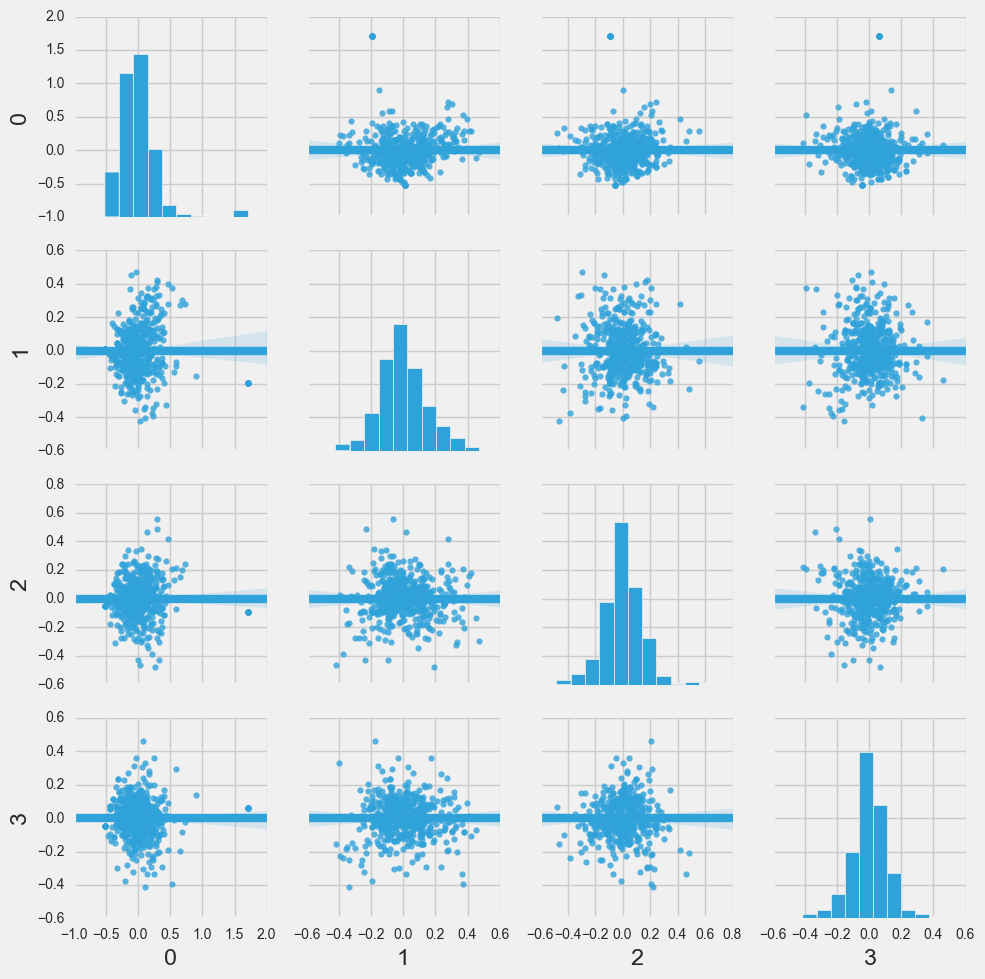

In [70]:
sub_pca, sub_decomp, sub_pairs = decomp(sub_df, 4)

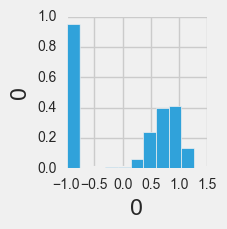

In [71]:
ob_pca, ob_decomp, ob_pairs = decomp(ob_df, 1)

# DBSCAN

In [53]:
db = cluster.DBSCAN(eps=0.8)

In [54]:
db.fit(like_decomposed)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
    min_samples=5, n_jobs=1, p=None)

In [55]:
from scipy import stats, spatial

In [56]:
spatial.distance.pdist(like_decomposed)

array([ 1.75963269,  1.50726094,  1.82689622, ...,  0.83909284,
        1.00020406,  1.22624167])

In [57]:
db.labels_

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0, -1,  1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [34]:
def plot_dbscan(db, X):
    fig = plt.figure(figsize=(10,8))
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)
        
        
    plt.gca().set_xlim(-2.5,2.5)
    plt.gca().set_ylim(-2.5,2.5)
    plt.title('Number of clusters: %d' % n_clusters_);